EDA-1. Language Gap 증명 (Description vs Review Embedding Distance)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

brand = pd.read_csv("../data_csv/final_perfume_data.csv", encoding="latin1")
user = pd.read_csv("../data_csv/fra_perfumes.csv", encoding="utf-8")

In [2]:
brand_words = [
    "soft","elegant","sensual","warm","fresh","airy",
    "deep","mysterious","luminous","refined","smooth"
]

user_words = [
    "sharp","metallic","sweet","powdery",
    "heavy","woody","green","animalic"
]

In [3]:
brand_text = (
    brand["Description"].fillna("") + " " + brand["Notes"].fillna("")
).str.lower()

brand_counts = Counter(
    w for text in brand_text for w in brand_words if w in text
)

brand_df = pd.DataFrame.from_dict(
    brand_counts, orient="index", columns=["count"]
).sort_values("count", ascending=False)

In [4]:
user_accords = user["Main Accords"].dropna().str.lower()

user_counts = Counter(
    w for text in user_accords for w in user_words if w in text
)

user_df = pd.DataFrame.from_dict(
    user_counts, orient="index", columns=["count"]
).sort_values("count", ascending=False)

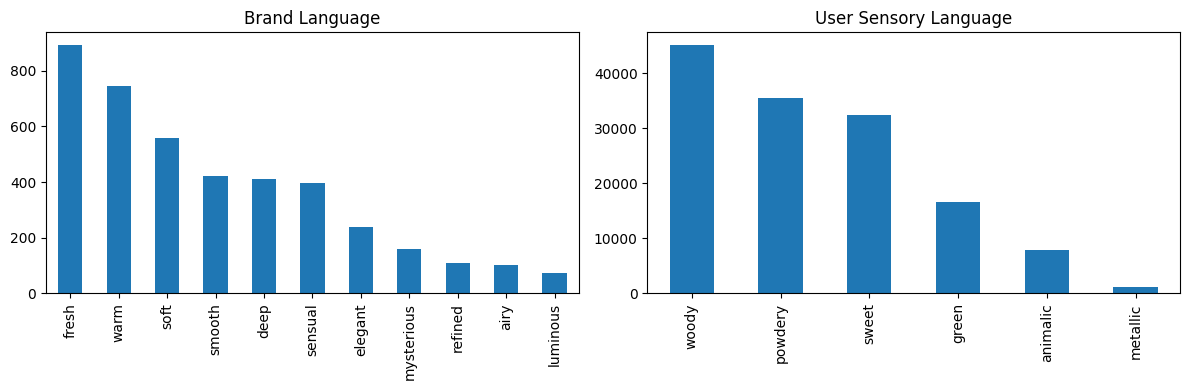

In [5]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

brand_df.plot(kind="bar", ax=axes[0], legend=False)
axes[0].set_title("Brand Language")

user_df.plot(kind="bar", ax=axes[1], legend=False)
axes[1].set_title("User Sensory Language")

plt.tight_layout()
plt.show()

결론
브랜드 언어는 추상·미학 중심, 소비자 언어는 감각·물성 중심
→ 언어 축이 구조적으로 분리됨